### t2.micro, AWS Marketplace -> Anaconda with Python 3

### 1) L1 Regularization

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for Alpha in [10, 1, 0.1, 0.01, 0.001, 0.0001]:

  predictions = np.round(Lasso(alpha=Alpha).fit(X_train, y_train).predict(X_test))
  print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5) + ', Alpha: ' + str(Alpha))

Accuracy: 0.34211, Alpha: 10
Accuracy: 0.34211, Alpha: 1
Accuracy: 0.94737, Alpha: 0.1
Accuracy: 0.97368, Alpha: 0.01
Accuracy: 0.97368, Alpha: 0.001
Accuracy: 0.97368, Alpha: 0.0001


### 2) L2 regularization

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for Alpha in [10, 1, 0.1, 0.01, 0.001, 0.0001]:

  predictions = np.round(Ridge(alpha=Alpha).fit(X_train, y_train).predict(X_test))
  print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5) + ', Alpha: ' + str(Alpha))

Accuracy: 0.94737, Alpha: 10
Accuracy: 0.94737, Alpha: 1
Accuracy: 0.92105, Alpha: 0.1
Accuracy: 0.92105, Alpha: 0.01
Accuracy: 0.92105, Alpha: 0.001
Accuracy: 0.92105, Alpha: 0.0001


### 3) Elastic Net

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for L1Ratio in [0.0, 0.5, 1.0]:

  for Alpha in [10, 1, 0.1]:

    predictions = np.round(ElasticNet(alpha=Alpha, l1_ratio=L1Ratio).fit(X_train, y_train).predict(X_test))

    print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5)  + ', L1 Ratio: ' + str(L1Ratio) + ', Alpha: ' + str(Alpha))

  print ('-')

Accuracy: 0.36842, L1 Ratio: 0.0, Alpha: 10
Accuracy: 0.97368, L1 Ratio: 0.0, Alpha: 1
Accuracy: 0.97368, L1 Ratio: 0.0, Alpha: 0.1
-
Accuracy: 0.36842, L1 Ratio: 0.5, Alpha: 10
Accuracy: 0.84211, L1 Ratio: 0.5, Alpha: 1
Accuracy: 0.97368, L1 Ratio: 0.5, Alpha: 0.1
-
Accuracy: 0.36842, L1 Ratio: 1.0, Alpha: 10
Accuracy: 0.36842, L1 Ratio: 1.0, Alpha: 1
Accuracy: 0.97368, L1 Ratio: 1.0, Alpha: 0.1
-


### 4) Ensemble Methods

In [1]:
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

predictions = RandomForestClassifier(n_estimators=100).fit(X_train, y_train).predict(X_test)

print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5))

Accuracy: 0.97368


### 5) K-fold Cross Validation

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import cross_val_score

iris   = datasets.load_iris()
scores = cross_val_score(svm.SVC(kernel='linear'), iris.data, iris.target, cv=5)

print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


### 6) Pruning / Reduce Complexity

In [2]:
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for Depth in [1,2,3]:

  predictions = DecisionTreeClassifier(max_depth=Depth).fit(X_train, y_train).predict(X_test)
  print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5) + ', Depth: ' + str(Depth))

Accuracy: 0.60526, Depth: 1
Accuracy: 0.97368, Depth: 2
Accuracy: 0.94737, Depth: 3


### 7) Dropout

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 58us/step - loss: 0.4204 - acc: 0.8128 - val_loss: 0.3329 - val_acc: 0.8563
Epoch 2/3
25000/25000 [==============================] - 1s 49us/step - loss: 0.3408 - acc: 0.8595 - val_loss: 0.3234 - val_acc: 0.8625
Epoch 3/3
25000/25000 [==============================] - 1s 49us/step - loss: 0.3325 - acc: 0.8623 - val_loss: 0.3269 - val_acc: 0.8617


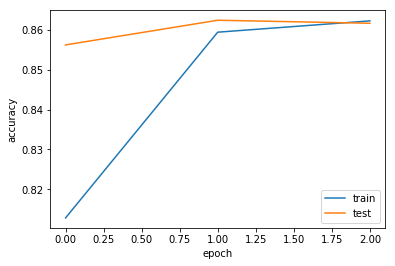

In [2]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

(train_data, train_target), (test_data, test_target) = imdb.load_data()

network = models.Sequential()
network.add(layers.Dense(units=16))
#
network.add(layers.Dropout(0.5))
#
network.add(layers.Dense(units=1, activation='sigmoid'))
network.compile(
                loss      = 'binary_crossentropy',
                optimizer = 'rmsprop'            ,
                metrics   = ['accuracy']
               )

history = network.fit(
                      Tokenizer(num_words=1000).sequences_to_matrix(train_data),
                      train_target                                             ,
                      validation_data = (
                                         Tokenizer(num_words=1000).sequences_to_matrix(test_data), 
                                         test_target
                                        )                                      ,
                      epochs          = 3
                     )

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

### 5) Backtesting

### 9) Add more Data

### 10 Remove Features

### 9) Data Augmentation

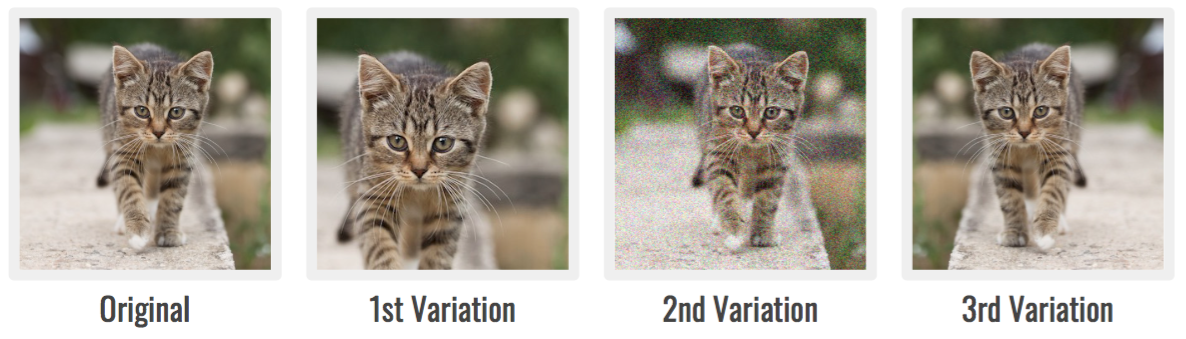

In [3]:
from IPython.display import Image
Image(filename='AugmentedCat.png')

### 10) Early Stopping

In [2]:
import numpy as np
import xgboost as xgb
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

dtrain      = xgb.DMatrix(X_train, y_train)
bst         = xgb.train({}, dtrain, num_boost_round=10000, evals=[(dtrain, 'train')], early_stopping_rounds=10)
predictions = np.round(bst.predict(xgb.DMatrix(X_test)))

print('Accuracy: {:.{}f}'.format(metrics.accuracy_score(y_test, predictions), 5))

[19:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[0]	train-rmse:0.704695
Will train until train-rmse hasn't improved in 10 rounds.
[19:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[1]	train-rmse:0.502168
[19:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[2]	train-rmse:0.358417
[19:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[3]	train-rmse:0.257521
[19:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[4]	train-rmse:0.184566
[19:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	train-rmse:0.134782
[19:32:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[6]	train-rmse:0.